In [6]:
import tensorflow as tf
import keras
import pandas
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [3]:
path = "D:\Project\Detecting sidewalk\Dataset\Dataset01"

Dataset  = []

for i in os.listdir(path):
    
    img = plt.imread(path+'/'+i)
    img = rgb2gray(img)                              #Convert to grayscale

    Dataset.append(img)

KeyboardInterrupt: 

2515


<function matplotlib.pyplot.show(*args, **kw)>

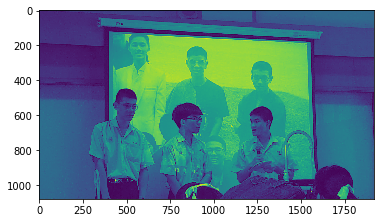

In [7]:
print(len(Dataset))
plt.imshow(Dataset[2514])
plt.show

In [ ]:
#Extract video to image

In [4]:
counter = 0
path = 'D:\Project\AR dataset'
for i in os.listdir(path):
    newpath = path+'/Dataset' + str(counter) 
    if not os.path.exists(newpath):
        os.makedirs(newpath)
    print(path+'/'+i)
    vidcap = cv2.VideoCapture(path+'/'+i)
    success,image = vidcap.read()
    count = 0
    count_frame = 0
    while success:
        cv2.imwrite(newpath + "/frame%d.jpg" % count, image)     # save frame as JPEG file
        count_frame += 30 # i.e. at 30 fps, this advances one second
        vidcap.set(1, count_frame)
        success,image = vidcap.read()
        print('Read a new frame: ', success)
        count +=1
    counter +=1

D:\Project\AR dataset/20200130_165050.mp4
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  False
D:\Project\AR dataset/20200130_165159.mp4
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True


KeyboardInterrupt: 

In [7]:
import cv2

cap = cv2.VideoCapture('XYZ.avi')
count = 0

while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        cv2.imwrite('frame{:d}.jpg'.format(count), frame)
        count += 30 # i.e. at 30 fps, this advances one second
        cap.set(1, count)
    else:
        cap.release()
        break

In [ ]:
#start modeling

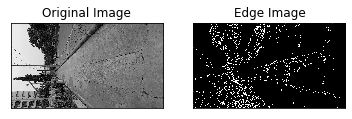

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('D:\Project\AR dataset\Dataset0/frame0.jpg',0)

kernel = np.ones((10,10),np.float32)/25
blur = cv2.GaussianBlur(img,(5,5),0)

edges = cv2.Canny(blur,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    
    
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
import cv2
import numpy as np

img = cv2.imread('D:\Project\AR dataset\Dataset0/frame0.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray,(5,5),0)
edges = cv2.Canny(blur,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('houghlines5.jpg',img)

True

2992


<function matplotlib.pyplot.show(*args, **kw)>

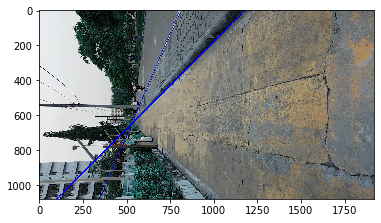

In [49]:
import cv2
import numpy as np

img = cv2.imread('D:\Project\AR dataset\Dataset0/frame1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(img,(5,5),0)
edges = cv2.Canny(blur,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200,100,10)
print(len(lines))

for i in range(0,3):
    
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)
plt.imshow(img)
plt.show

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(32, input_shape=(1920,1080)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

In [10]:
print(img.shape)

(1080, 1920)
